## Jiayi's Sudoku solver (part2) - using genetic algorithm as the sudoku solver

#### A demo on solving different level of Sudoku puzzles using genetic algorithm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jiayi_sudoku_solver.Sudoku as Sudoku 
from jiayi_sudoku_solver.genetic_algo import *
from jiayi_sudoku_solver.util import show_sudoku_with_known_truth

##### Look at an easy puzzle first

In [4]:
startingSudoku1 =   """
                    430260700
                    682070493
                    107804500
                    820190047
                    004602910
                    950703028
                    509306070
                    240057106
                    703018250
                    """

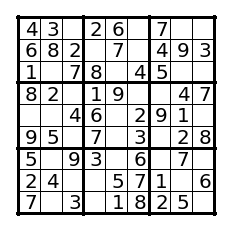

In [5]:
sudoku_obj = Sudoku.Sudoku(startingSudoku1)
show_sudoku_filled(sudoku_obj.np_Sudoku)

#### The genetic algorithm found a solution in generation 28

Solved in generation 28, time used is 0.2655351161956787


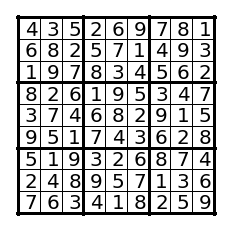

In [6]:
genetic_algorithm(startingSudoku = startingSudoku1, max_generation =80)

##### Now let's try a difficult one, Vegard Hanssen puzzle 2155141 taken from [here](https://sandiway.arizona.edu/sudoku/examples.html)

In [7]:
startingSudoku2 = """
                    000600400
                    700003600
                    000091080
                    000000000
                    050180003
                    000306045
                    040200060
                    903000000
                    020000100
                   """
solvedstartingSoduku2 = """
                        581672439
                        791843651
                        364591782
                        438957216
                        256184973
                        179326845
                        845219367
                        913768524
                        627435198
                        """

##### The genetic algorithm didn't find the ultimate solution, but the close form solution only has 2 column errors

In [8]:
close_to_solved_puzzle2 = genetic_algorithm(startingSudoku = startingSudoku2, max_generation =5000)

not solved, min error is 2


In [13]:
close_to_solved_puzzle2

array([[3, 8, 1, 6, 5, 2, 4, 9, 7],
       [7, 9, 2, 8, 4, 3, 6, 5, 1],
       [5, 6, 4, 7, 9, 1, 3, 8, 2],
       [2, 3, 8, 4, 7, 5, 9, 1, 6],
       [4, 5, 6, 1, 8, 9, 7, 2, 3],
       [1, 7, 9, 3, 2, 6, 8, 4, 5],
       [8, 4, 7, 2, 1, 3, 5, 6, 9],
       [9, 1, 3, 5, 6, 8, 2, 7, 4],
       [6, 2, 5, 9, 4, 7, 1, 3, 8]])

We can see this solution has no row error (all rows have 9 unique numbers), whereas two column has only 8 unique numbers

In [23]:
rowwise_correct = [len(set([x for x in close_to_solved_puzzle2[i] if x!=0])) for i in range(9)]
colwise_correct = [len(set([x for x in close_to_solved_puzzle2.T[i] if x!=0])) for i in range(9)]
rowwise_correct,colwise_correct

([9, 9, 9, 9, 9, 9, 9, 9, 9], [9, 9, 9, 9, 8, 8, 9, 9, 9])

#### Compare the predicted solution with the correct answer shows that the algorithm is trapped in local minimum. The two errors detected indicated many other numbers filled are not correct even if the constraints were met. 

*black*: given number from the puzzle 


*blue*: correctly predicted answer


*red*: predicted answer, wrong


*green*: true answer

Plotting function adapted from https://gitlab.com/ostrokach/proteinsolver/

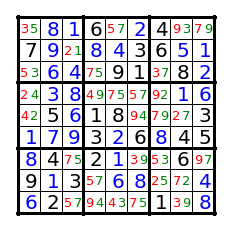

In [17]:
show_sudoku_with_known_truth(original_puzzle = Sudoku.Sudoku(startingSudoku2).np_Sudoku,
                             solved = Sudoku.Sudoku(solvedstartingSoduku2).np_Sudoku,
                            pred = close_to_solved_puzzle2)

Let's try another random one from the internet

In [18]:
startingSudoku3 = """
                    020608000
                    580009700
                    000040000
                    370000500
                    600000004
                    008000013
                    000020000
                    009800036
                    000306090
                  """
solvedstartingSoduku3 = """
                        123678945
                        584239761
                        967145328
                        372461589
                        691583274
                        458792613
                        836924157
                        219857436
                        745316892
                        """

In [19]:
close_to_solved_puzzle3 = genetic_algorithm(startingSudoku = startingSudoku3, max_generation =50000)

not solved, min error is 2


##### Similar to the above, we can see this solution has no row error (all rows have 9 unique numbers), whereas two column has only 8 unique numbers

In [20]:
rowwise_correct = [len(set([x for x in close_to_solved_puzzle2[i] if x!=0])) for i in range(9)]
colwise_correct = [len(set([x for x in close_to_solved_puzzle2.T[i] if x!=0])) for i in range(9)]
rowwise_correct, colwise_correct

([9, 9, 9, 9, 9, 9, 9, 9, 9], [9, 9, 9, 9, 8, 8, 9, 9, 9])

Similar to the above puzzle, it seems that the algorithm is trapped in local minimum. The two errors detected indicated many other numbers filled are not correct even if the constraints were met.

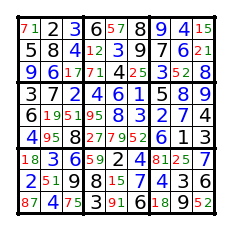

In [21]:
show_sudoku_with_known_truth(original_puzzle = Sudoku.Sudoku(startingSudoku3).np_Sudoku,
                             solved = Sudoku.Sudoku(solvedstartingSoduku3).np_Sudoku,
                            pred = close_to_solved_puzzle3)